In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
import random

In [7]:
data = pd.read_csv("creditcard.csv")
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

print (data.shape)
print (x.shape)
print (y.shape)

(284807, 31)
(284807, 30)
(284807,)


In [8]:
x = x.drop('Time', 1)
x = x.drop('Amount', 1)

x_one = x.drop('V15', 1).drop('V16', 1).drop('V17', 1).drop('V18', 1).drop('V19', 1).drop('V20', 1).drop('V21', 1).drop('V22', 1).drop('V23', 1).drop('V24', 1).drop('V25', 1).drop('V26', 1).drop('V27', 1).drop('V28', 1)

x_two = x.drop('V1', 1).drop('V2', 1).drop('V3', 1).drop('V4', 1).drop('V5', 1).drop('V6', 1).drop('V7', 1).drop('V8', 1).drop('V9', 1).drop('V10', 1).drop('V11', 1).drop('V12', 1).drop('V13', 1).drop('V14', 1)

In [9]:
#function to plot features
def plotf(x, isfraud):
    test = y.loc[y == isfraud]
    if (test.shape[0] > 1000):
        test = test.head(1000)
    plt.figure(figsize=(10, 10))
    for i in range(test.shape[0]):
        case = x.iloc[test.index[i]]
        case.plot(kind = 'line')

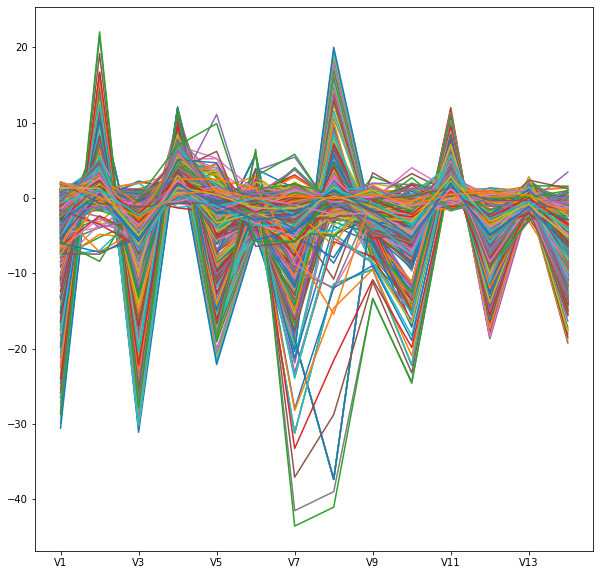

In [10]:
#plot of first half FRAUD
plotf(x_one, 1)

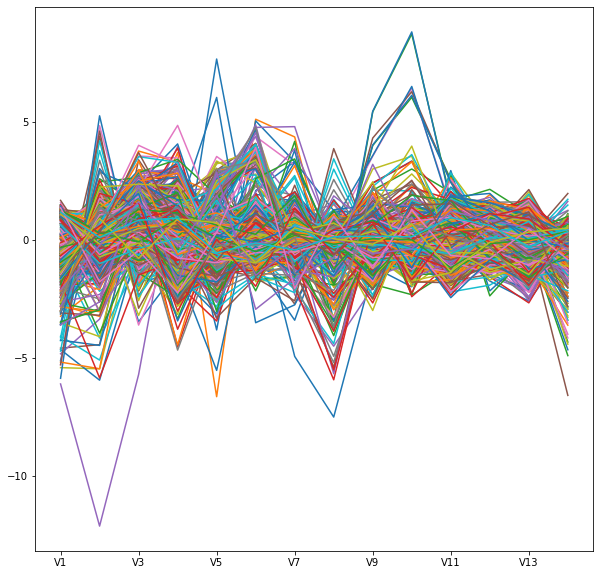

In [11]:
#plot of second half fraud
plotf(x_one, 0)

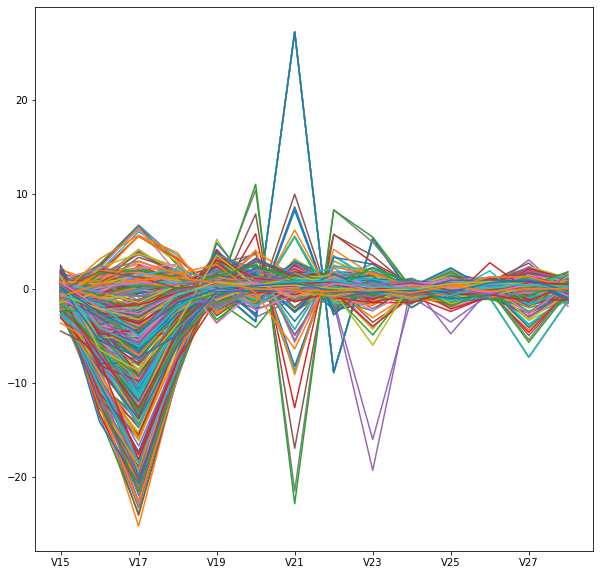

In [12]:
#plot of first half genuine payment
plotf(x_two, 1)

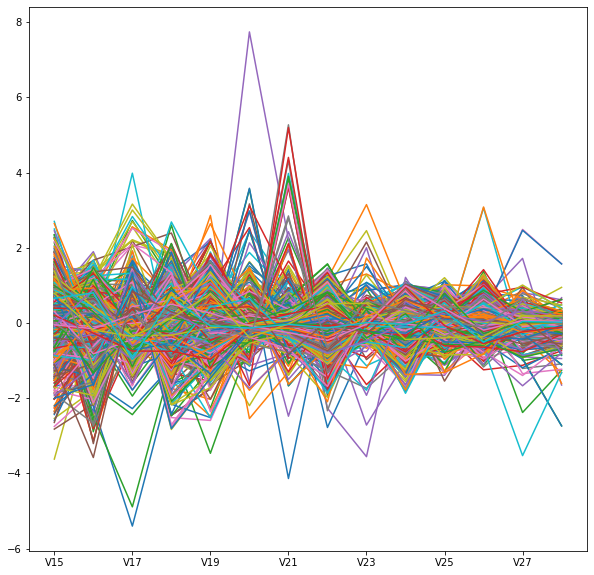

In [13]:
plotf(x_two, 0)

In [14]:
#As we can see, for the first data set, the key features that mainly determine fraud or genuine payment are
#V1,V2,V3,V4,V5,V7.V8,V10,V11,V12. When these features are high then fraud, when low, genuine payment, hence high correlation
#For second half of dataset, only V17 and V21 are high when fraud, but when genuine only V17 is low,
#hence only V17 is the significant feature from the second half dataset. Hence we now remove the rest and move
#forward with these features only and apply Random Forest Classificatio Algorithm on it.


In [15]:
new=x.filter(['V1','V2','V3','V4','V5','V7','V8','V10','V11','V12','V17'], axis=1)

In [16]:
xData = new.values 
yData = y.values 
print(new.shape)

(284807, 11)


In [17]:
# Using Skicit-learn to split data
from sklearn.model_selection import train_test_split 
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state =42) 

In [18]:
from sklearn.ensemble import RandomForestClassifier 

ranfor = RandomForestClassifier(random_state=42) 
ranfor.fit(xTrain, yTrain) 
# predictions 
yPred = ranfor.predict(xTest) 

In [19]:
# Evaluating the classifier 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred != yTest).sum() 

f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 

ac = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(ac)) 

pr = precision_score(yTest, yPred) 
print("The precision is {}".format(pr)) 

rc = recall_score(yTest, yPred) 
print("The recall is {}".format(rc)) 

The F1-Score is 0.8491620111731844
The accuracy is 0.9995259997893332
The precision is 0.9382716049382716
The recall is 0.7755102040816326
